In [ ]:
# 01 – Data Collection & Exploration

'''This notebook explores the pre-market stock data collected using `fetch_and_save_premarket.py`.

- Load the latest pre-market data  
- Visualize gap percentages  
- Begin identifying patterns in movers'''


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load premarket data
df = pd.read_csv('../notebooks/daily_report.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df

ticker  prev_close    open  gap_pct                  timestamp
0   NVDA      157.25  158.37     0.71 2025-07-05 10:15:47.000464
1   TSLA      315.65  317.99     0.74 2025-07-05 10:15:47.142641
2   AAPL      212.44  212.15    -0.14 2025-07-05 10:15:47.285250
3    AMD      138.52  139.11     0.43 2025-07-05 10:15:47.374825
4   MSFT      491.09  493.81     0.55 2025-07-05 10:15:47.576358

In [ ]:
### What is a Gap?

''' A **gap** occurs when a stock opens significantly higher or lower than its previous day's closing price.  
This project uses `gap_pct` to detect such movements.

**Formula:** gap_pct = ((open - prev_close) / prev_close) * 100


- **Gap Up**: Bullish move → opens higher than it closed
- **Gap Down**: Bearish move → opens lower than it closed

We use this to find stocks likely to show momentum early in the trading day — ideal setups for options trades.

'''


/tmp/ipykernel_8092/1937167856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='ticker', y='gap_pct', palette='coolwarm')


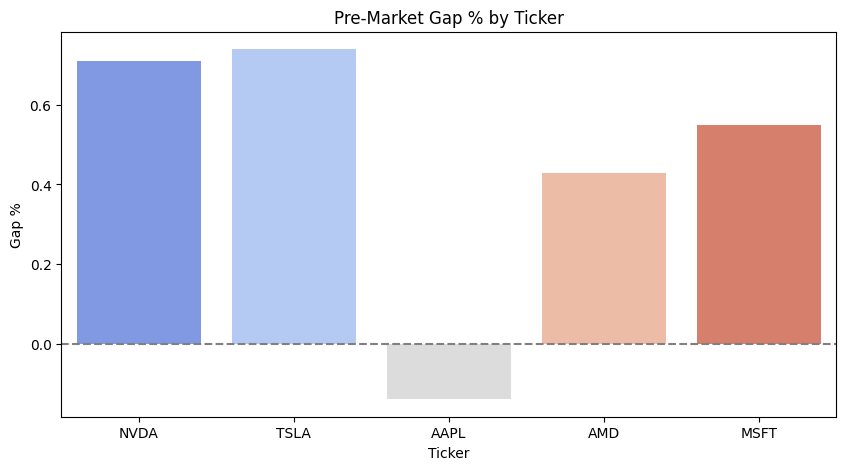

In [6]:
# Plot gap percentage distribution
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='ticker', y='gap_pct', palette='coolwarm')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Pre-Market Gap % by Ticker')
plt.ylabel('Gap %')
plt.xlabel('Ticker')
plt.show()

In [7]:
from yahoo_fin import news
news.get_yf_rss("TSLA")  # quick test

[{'summary': "With President Trump's budget now law, the focus shifts back to tariffs this week. Tesla rival Uber leads five stocks in buy zones.",
  'summary_detail': {'type': 'text/html',
   'language': None,
   'base': 'https://feeds.finance.yahoo.com/rss/2.0/headline?s=TSLA&region=US&lang=en-US',
   'value': "With President Trump's budget now law, the focus shifts back to tariffs this week. Tesla rival Uber leads five stocks in buy zones."},
  'id': '6bfb0ee6-8533-399a-84d6-b9c0411d76db',
  'guidislink': False,
  'links': [{'rel': 'alternate',
    'type': 'text/html',
    'href': 'https://finance.yahoo.com/m/6bfb0ee6-8533-399a-84d6-b9c0411d76db/dow-jones-futures%3A-tariffs-in.html?.tsrc=rss'}],
  'link': 'https://finance.yahoo.com/m/6bfb0ee6-8533-399a-84d6-b9c0411d76db/dow-jones-futures%3A-tariffs-in.html?.tsrc=rss',
  'published': 'Sat, 05 Jul 2025 14:03:19 +0000',
  'published_parsed': time.struct_time(tm_year=2025, tm_mon=7, tm_mday=5, tm_hour=14, tm_min=3, tm_sec=19, tm_wday=5,

In [8]:
# Save the final filtered_df to CSV
filtered_df.to_csv("daily_report.csv", index=False)